# Top Flight Analysis #

#### Using data collected from myfootballfacts.com ####

*First, import pandas, import data already collected in four csv files.
Merge the data into one dataframe.*

In [1]:
import pandas as pd

In [2]:
def harmonise_headings(csv, date1, date2):
    df = pd.read_csv(csv)
    df.rename(columns = {'Unnamed:0':'Season'})
    season = [x for x in range(date1, date2)]
    df.insert(0, 'Season', season)
    df.drop(['Unnamed: 0','0'], axis = 1, inplace=True)
    return df

top1946_1992 = harmonise_headings(csv = 'league positions 1946 - 1992.csv', date1 = 1946, date2 = 1992)
top1914_1939 = harmonise_headings(csv = 'league positions 1919-1940.csv', date1 = 1919, date2 = 1940)
top1888_1914 = harmonise_headings(csv = 'league positions to 1915.csv', date1 = 1887, date2 = 1914)
#prem already done = others adapted to match
prem = pd.read_csv('Prem seasons in rows.csv')
prem = prem.sort_values(['Season'])

all_top = pd.concat([top1888_1914,top1914_1939,top1946_1992, prem], sort = False)

*Tweak data to make it usable. Quite a bit of cleaning has already been done, but the data is still not quite all uniform.*

In [3]:
#columns named with simple integers is actually not very helpful
all_top.rename(columns = {'1':'1st','2':'2nd','3':'3rd','4':'4th','5':'5th','6':'6th','7':'7th','8':'8th','9':'9th',
                          '10':'10th','11': '11th','12':'12th','13':'13th','14':'14th','15':'15th','16':'16th','17':'17th',
                          '18':'18th','19':'19th','20':'20th','21':'21st','22':'22nd'}, inplace = True)
#some columns we do not want - 'Unnamed: 0' is generated by creating new frames
all_top.drop(['Unnamed: 0','23'], axis = 1, inplace=True)

#alternative column headings - may be needed if some methods and properties won't work with 'numeral-first' naming - you live and learn
#{'1':'p_1st','2':'p_2nd','3':'p_3rd','4':'p_4th','5':'p_5th','6':'p_6th','7':'p_7th','8':'p_8th','9':'p_9th',
#'10':'p_10th','11': 'p_11th','12':'p_12th','13':'p_13th','14':'p_14th','15':'p_15th','16':'p_16th','17':'p_17th',
#'18':'p_18th','19':'p_19th','20':'p_20th','21':'p_21st','22':'p_22nd'}

#add a column for how many teams got relegated each season - thinking back I suppose this is a little inaccurate: when there were
#changes in the 90s I am not positive that these were all relegations. The best way to resolve this might be to go back and use
#consecutive seasons code somehow to work out how many times teams have been relegated.
relegation_numbers = {'Relegation': [0, 1, 0, 1, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
                               2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 
                               2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 2, 
                               3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]}
all_top.insert(1, 'Relegation', relegation_numbers['Relegation'])

###### deal with name changes - pesky teams have changed their names
swaps = {'Newton Heath' : 'Manchester United / Newton Heath' , 
         'Manchester United':  'Manchester United / Newton Heath', 
         'Woolwich Arsenal' : 'Arsenal / Woolwich Arsenal' , 
         'Arsenal' : 'Arsenal / Woolwich Arsenal', 
         'Small Heath' : 'Birmingham City / Birmingham / Small Heath', 
         'Birmingham' : 'Birmingham City / Birmingham / Small Heath' , 
         'Birmingham City' : 'Birmingham City / Birmingham / Small Heath',
         'Leicester Fosse' : 'Leicester City / Leicester Fosse' ,
         'Leicester City' : 'Leicester City / Leicester Fosse' ,
         'The Wednesday' : 'Sheffield Wednesday / The Wednesday',
         'Sheffield Wednesday': 'Sheffield Wednesday / The Wednesday',
        'Cardiff City [notes 1]': 'Cardiff City',
        'Stoke':'Stoke City / Stoke',
        'Stoke City': 'Stoke City / Stoke',
        '''Queen's Park Rangers''': 'Queens Park Rangers'}

all_top.replace(swaps, inplace=True)

##############################

all_top.to_csv('all top flight positions.csv')

**What clubs have won the top flight?**

In [4]:
print (all_top['1st'].unique())

['Preston North End' 'Everton' 'Sunderland' 'Aston Villa'
 'Sheffield United' 'Liverpool' 'Sheffield Wednesday / The Wednesday'
 'Newcastle United' 'Manchester United / Newton Heath' 'Blackburn Rovers'
 'West Bromwich Albion' 'Burnley' 'Huddersfield Town'
 'Arsenal / Woolwich Arsenal' 'Manchester City' 'Blackpool' 'Portsmouth'
 'Tottenham Hotspur' 'Wolverhampton Wanderers' 'Chelsea' 'Ipswich Town'
 'Leeds United' 'Derby County' 'Nottingham Forest'
 'Leicester City / Leicester Fosse']


In [5]:
winners = pd.DataFrame(all_top.groupby('1st').Season.count().sort_values(ascending = False).reset_index())
winners.columns = ['Club','Wins']
winners

,Club,Wins
0,Manchester United / Newton Heath,20
1,Liverpool,18
2,Arsenal / Woolwich Arsenal,13
3,Everton,9
4,Aston Villa,7
5,Sunderland,6
6,Chelsea,6
7,Manchester City,5
8,Sheffield Wednesday / The Wednesday,4
9,Newcastle United,4


**How successful have other teams been?**
*How many times has each team finished in each position in the top flight?*

In [6]:
df_leagueplace = pd.DataFrame(columns = ['Club', '0'])

#look down column given, 1st, 2nd etc, and count up times teams appear in column
#there must be a much more efficient way to do this, but I want a dataframe not a dictionary, so Counter would take just as long
def add_to_place_count (strPosition):
    df = all_top.groupby([strPosition]).Season.count().sort_values(ascending = False)
    df = df.to_frame().reset_index()
    df.columns = ['Club', strPosition]
    return df

for x in all_top.columns[2:]:
    df_leagueplace = pd.merge(df_leagueplace, add_to_place_count(x), how='outer')
df_leagueplace.drop('0', axis = 1, inplace = True)
df_leagueplace.head(5)


,Club,1st,2nd,3rd,4th,5th,6th,7th,8th,9th,...,13th,14th,15th,16th,17th,18th,19th,20th,21st,22nd
0,Manchester United / Newton Heath,20.0,16.0,6.0,8.0,3.0,3.0,3.0,6.0,3.0,...,4.0,2.0,2.0,2.0,1.0,3.0,1.0,NaN,2.0,2.0
1,Liverpool,18.0,13.0,7.0,11.0,9.0,4.0,6.0,6.0,4.0,...,2.0,1.0,1.0,4.0,3.0,2.0,1.0,NaN,NaN,1.0
2,Arsenal / Woolwich Arsenal,13.0,9.0,10.0,12.0,10.0,6.0,6.0,2.0,4.0,...,3.0,3.0,NaN,1.0,2.0,1.0,1.0,2.0,NaN,NaN
3,Everton,9.0,7.0,7.0,9.0,8.0,6.0,11.0,6.0,2.0,...,2.0,5.0,9.0,5.0,6.0,3.0,1.0,2.0,NaN,2.0
4,Aston Villa,7.0,10.0,2.0,6.0,5.0,15.0,5.0,9.0,4.0,...,3.0,2.0,6.0,7.0,3.0,1.0,1.0,2.0,3.0,1.0


*Doesn't tell me that much. Needs summarising.*

**Which team(s) have finished the most times in each position?** 
*Error handling for when more than one team did this takes up most of the code.*

In [7]:
def most_finishes(strPosition):
    x = df_leagueplace[df_leagueplace[strPosition] == df_leagueplace[strPosition].max()]
    return x
#make a dictionary of places, and teams that have finished there the most
dict_finishes = {}
#can't think of a way to handle getting one team or more than one team without an exception at the moment
for x in df_leagueplace.columns[2:24]:
    try:
        dict_finishes [x] = [most_finishes(x).Club.item(),  #pick up the club name
                             str(int(most_finishes(x)[x].item())) + ' times']   #pick up the number of times
    except ValueError: #  .item throws an error if there is more than one team, so exception uses .values instead
        #.values produces an object, which needs changing into a list to get the actual values
        dict_finishes [x] = [list(most_finishes(x).Club.values),str(int(most_finishes(x)[x].values[1].item())) + ' times']

print (dict_finishes)

{'2nd': ['Manchester United / Newton Heath', '16 times'], '3rd': ['Tottenham Hotspur', '11 times'], '4th': ['Arsenal / Woolwich Arsenal', '12 times'], '5th': ['Arsenal / Woolwich Arsenal', '10 times'], '6th': ['Aston Villa', '15 times'], '7th': ['Everton', '11 times'], '8th': ['Aston Villa', '9 times'], '9th': [['Nottingham Forest', 'West Ham United', 'Stoke City / Stoke'], '6 times'], '10th': ['Arsenal / Woolwich Arsenal', '9 times'], '11th': ['Everton', '12 times'], '12th': ['Stoke City / Stoke', '8 times'], '13th': [['West Bromwich Albion', 'Stoke City / Stoke'], '8 times'], '14th': [['West Bromwich Albion', 'Sheffield United', 'Bolton Wanderers'], '6 times'], '15th': ['Blackburn Rovers', '10 times'], '16th': ['Aston Villa', '7 times'], '17th': ['Birmingham City / Birmingham / Small Heath', '7 times'], '18th': ['Bolton Wanderers', '7 times'], '19th': ['Birmingham City / Birmingham / Small Heath', '7 times'], '20th': [['Sunderland', 'Nottingham Forest'], '6 times'], '21st': [['Manche

That's interesting. Man Utd seem to be the most successful team - finishing top 20 times and second 16 times. And Arsenal, kings of qualification for Europe(?), have indeed finished in the top 5 a lot of times. (Now, I wonder which team has qualified for Europe the most times ... )

Man City and Leicester seem to have been in what must be relegation positions more than most others. But they've both won it recently - they can't be the most frequently relegated teams, can they?

**What team has been relegated the most times?**

*This will mean knowing the relegation positions for each year. I went back and stuck that in when I tweaked the dataframe at the start*


In [8]:
import pandas as pd
from collections import Counter

relegations = pd.read_csv('all top flight positions.csv')

relegated = []
season_list = []
#look in each row
for y in range(len(relegations)):
    for x in range(len(relegations.iloc[y])):
        if (relegations.iloc[y][x]) == (relegations.iloc[y][x]):  #ignore Nan
            teams =  (relegations.iloc[y][x]) #collect teams
            season_list.append(teams) #add to a list
    #now get the relegated number
    int_relegated = relegations.iloc[y][2]
    #now get the relegated teams
    for x in range(int_relegated):
        relegated.append (season_list[int_relegated *-1])
        int_relegated += -1

#create a Counter for the list of relegated teams - it generates a dictionary
relegated_count = dict(Counter(relegated))

#blimey, there must be a more elegant and quicker way to do this, but it took ages to work this way out and make it function,
#so it will do for now

In [9]:
#make the Counter dictionary into a dataframe
df_relegated = pd.DataFrame.from_dict(relegated_count, orient='index').reset_index()
#name columns, sort, print top 10
df_relegated.columns = ['Club', 'Relegations']
df_relegated.sort_values('Relegations', ascending = False, inplace=True)
df_relegated.head(10)

,Club,Relegations
8,Birmingham City / Birmingham / Small Heath,12
20,Leicester City / Leicester Fosse,11
9,West Bromwich Albion,11
10,Sunderland,10
16,Manchester City,10
13,Bolton Wanderers,10
29,Middlesbrough,10
14,Sheffield Wednesday / The Wednesday,9
0,Stoke City / Stoke,9
6,Derby County,9


In [10]:
from matplotlib import pyplot as plt
import seaborn as sns
top_20_rels = df_relegated[df_relegated.Relegations >3]
top_20_rels
plt.figure(figsize = (15,10))
sns.barplot(data = top_20_rels, x = 'Club', y = 'Relegations')
plt.xticks(rotation = 90)
plt.title('Top 20 most relegated teams')
plt.show()

<Figure size 1500x1000 with 1 Axes>

So Birmingham City, Leicester City, West Brom have been relegated the most times. Interestingly Man City is close behind. Leicester and Man City have both won the Prem. I wonder how many times other league winners have been relegated.

In [11]:
#winners = all_top['1st'].groupby('Club').count().reset_index()
winners = pd.DataFrame(all_top.groupby('1st').Season.count().sort_values(ascending = False).reset_index())
winners.columns = ['Club','Wins']

winner_relegations = pd.merge(winners, df_relegated, how = 'left')

winner_relegations['Success Q'] = winner_relegations.Wins / winner_relegations.Relegations
winner_relegations.sort_values(by = 'Success Q', ascending = False, inplace = True)
winner_relegations

,Club,Wins,Relegations,Success Q
2,Arsenal / Woolwich Arsenal,13,1,13.000000
1,Liverpool,18,3,6.000000
3,Everton,9,2,4.500000
0,Manchester United / Newton Heath,20,6,3.333333
4,Aston Villa,7,5,1.400000
6,Chelsea,6,6,1.000000
11,Huddersfield Town,3,3,1.000000
9,Newcastle United,4,6,0.666667
16,Portsmouth,2,3,0.666667
5,Sunderland,6,10,0.600000


C:\Users\Jeremy\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


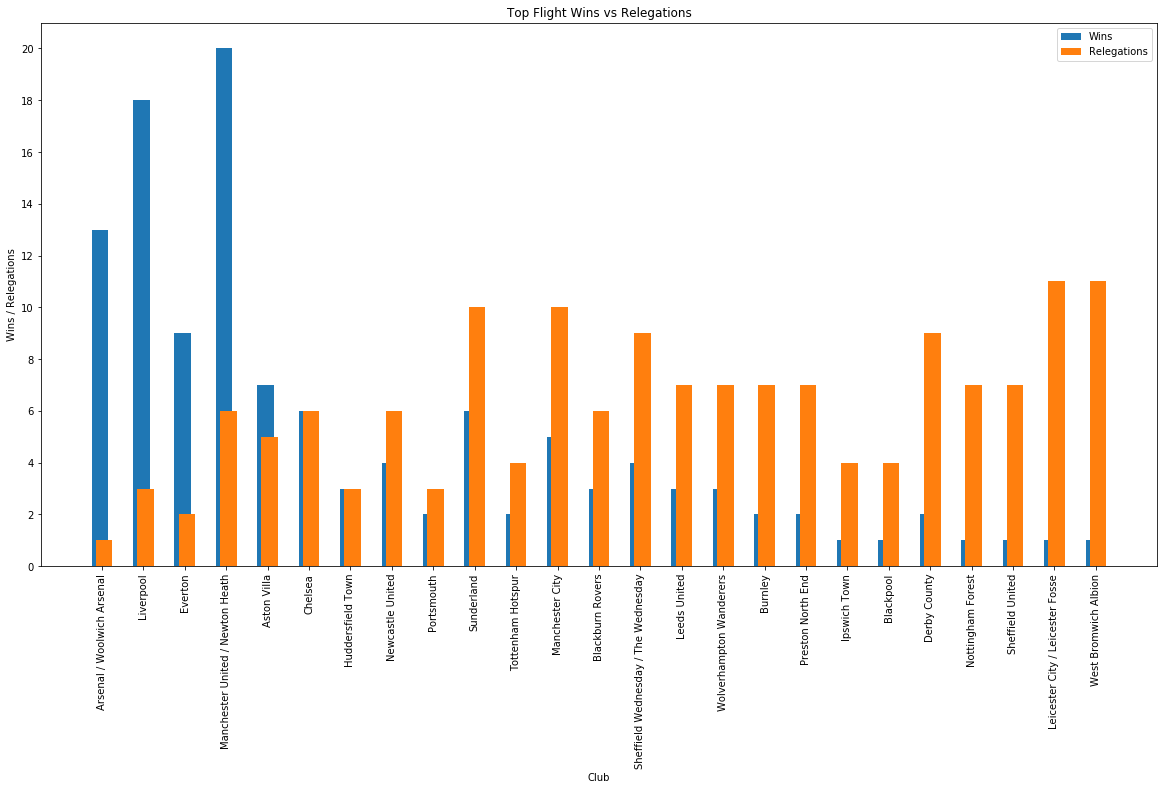

In [12]:
from matplotlib import pyplot as plt

club_names = list(winner_relegations.Club)
wins = list(winner_relegations.Wins)
relegations = list(winner_relegations.Relegations)

# China Data (blue bars)
n = 1  # This is our first dataset (out of 2)
t = 2 # Number of datasets
d = len(wins) # Number of sets of bars
w = 0.2 # Width of each bar
x_values1 = [t*element + w*n for element
             in range(d)]
# US Data (orange bars)
n = 2  # This is our second dataset (out of 2)
t = 2 # Number of datasets
d = len(relegations) # Number of sets of bars
w = 0.2 # Width of each bar
x_values2 = [t*element + w*n for element
             in range(d)]

mid_line = [x_values1[t] + ((x_values2[t] - x_values1[t]) /2) for t in range(len(x_values1))]

plt.figure(figsize = (20, 10))
plt.bar(x_values1, wins)
plt.bar(x_values2, relegations)

ax = plt.subplot()
ax.set_yticks(range(0, 22, 2))
ax.set_xticks(mid_line)
ax.set_xticklabels(club_names, rotation = 90)
ax.set(title = 'Top Flight Wins vs Relegations', ylabel = 'Wins / Relegations', xlabel = 'Club')
plt.legend(['Wins', 'Relegations'])
plt.show()


So,the most successful team is Arsenal, because they have won the most titles per relegation. The least successful are West Brom and Leicester. Derby, having won two titles, are still worse off than Ipswich and Blackpool! This all seems skewed: Man Utd have won the league 20 times! And as I remember it, they have come second 16 times. How can they be only the 4th most successful team? 
Now I wonder if this comes across better in side-by-side bar chart.

I also wonder what the most seasons in the top flight has been for a team relegated just once - ie it got promoted and then stayed for the longest time - because at first sight it looks like the one-time relegated teams are one-hit wonders (Glossop, Oxford United, Swindon).
That would mean counting the number of consecutive seasons a team appears.
Actually we can already see that Arsenal have only been relegated once, and come out as the most successful team as a result. 

I was really thinking about Wimbledon in this.

But first: **How many seasons has each club played in the top flight? Which team has played the most?**

In [13]:
df = pd.read_csv('all top flight positions.csv')
clubs_only = df.drop(['Unnamed: 0', 'Season', 'Relegation'], axis = 1)
q = clubs_only.stack().value_counts().reset_index()
q.columns = ['Club', 'Seasons']
q.head(20)

,Club,Seasons
0,Everton,116
1,Aston Villa,106
2,Liverpool,104
3,Arsenal / Woolwich Arsenal,102
4,Manchester United / Newton Heath,94
5,Manchester City,89
6,Sunderland,87
7,Newcastle United,86
8,Chelsea,84
9,Tottenham Hotspur,83


Everton. I think I already knew that, but Villa is maybe a surprise. On the other hand it is a big stadium, big enough to be used in the past for FA Cup semi finals. They are all quite big clubs. Or are they? Is there a correlation between their seasons in the top flight and their stadium capacity? Probably, but the biggest stadium would be Man Utd's - I know that. And then I don't know. I have the figures somewhere so I could compare them. Maybe later.

**What clubs have spent the most consecutive seasons in the top flight?**

In [14]:
df = pd.read_csv('all top flight positions.csv')
#stack uses the whole dataframe, so I need to trim off uncounted columns
clubs_only = df.drop(['Unnamed: 0', 'Season', 'Relegation'], axis = 1)

#create a list of clubs to feed into procedure below
clubnames = clubs_only.stack().unique()

#procedure to calculate number of seasons in a row in top flight
def consecutive_seasons(Clubname, df):    
    consec_max = 0
    consec = 0
    #make a list of whether or not club was there for every season - True/False
    seasons_list = [any(df.iloc[x].isin ([Clubname])) for x in range(len(df))]
    #loop to count consecutive Trues - there must be a way to remove the loop to speed it up, but it works for now
    for x in range(len(seasons_list)):
        if seasons_list[x] == True:
            consec += 1
        else:
            if consec_max < consec:
                consec_max = consec
                consec = 0
            else:
                consec = 0        
    if consec_max < consec:
        consec_max = consec
    return [Clubname, consec_max]

consec_seasons = pd.DataFrame([consecutive_seasons(Clubname, clubs_only) for Clubname in clubnames ], columns = ['Club', 'Seasons'])
consec_seasons.sort_values(by = 'Seasons', ascending = False, inplace = True)
consec_seasons.head(20)

,Club,Seasons
26,Arsenal / Woolwich Arsenal,93
7,Everton,64
12,Sunderland,58
19,Liverpool,56
3,Blackburn Rovers,44
1,Aston Villa,44
16,Manchester United / Newton Heath,43
31,Tottenham Hotspur,40
17,Sheffield United,37
48,Coventry City,34


Arsenal, Everton, Sunderland, Liverpool. Sunderland are currently in League One. Blackburn and Villa are in the Championship. Blackburn spent the 70s and 80s completely out of it, so they are the club whose record does not include the Premier League.

Now what about those apparent one-hit wonders? How long were the clubs that have only been relegated once in the league?

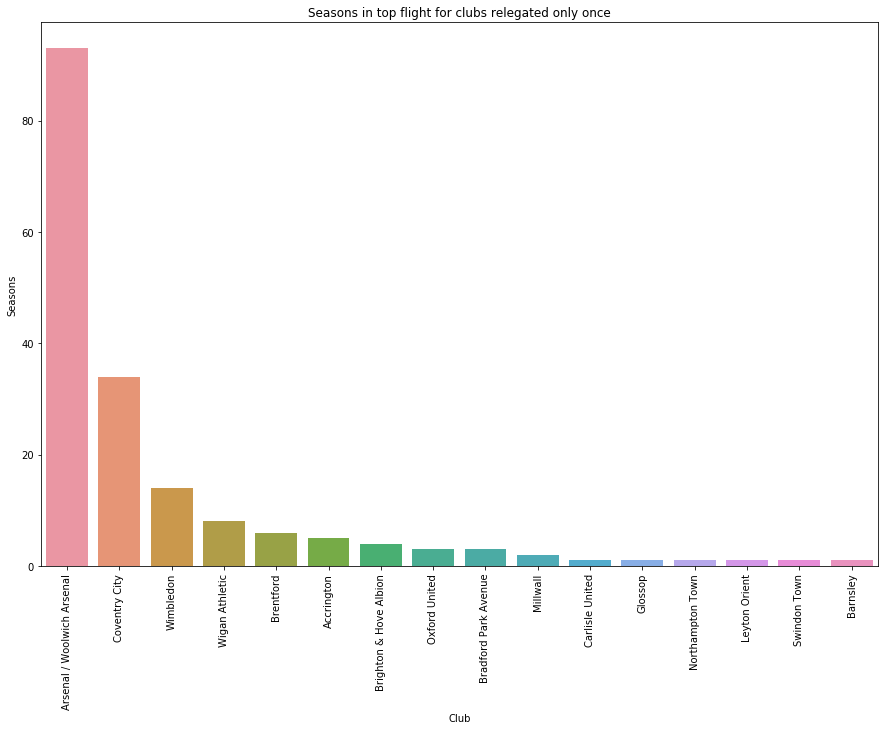

In [15]:
one_relegation = df_relegated[df_relegated.Relegations == 1]

one_hit_wonders = pd.merge(consec_seasons, one_relegation, how = 'right')

plt.figure(figsize = (15,10))
sns.barplot(data = one_hit_wonders, x = 'Club', y = 'Seasons')
plt.xticks(rotation = 90)
plt.title('Seasons in top flight for clubs relegated only once')
plt.show()

So I was right about Wimbledon. I should have realised Coventry would have been in for a long time. I think when they were relegated they were the team that had been in the longest without being relegated.

Sam says dividing the wins by the relegations doesn't really show success. What about including 2nd and 3rd?

In [16]:
#get together the number of times at 1st
first = all_top.groupby('1st').Season.count().reset_index()
first.columns = ['Club', '1st']
second = all_top.groupby('2nd').Season.count().reset_index()
second.columns = ['Club', '2nd']
third = all_top.groupby('3rd').Season.count().reset_index()
third.columns = ['Club', '3rd']
top3 = pd.merge(first, second, how = 'outer')
top3 = pd.merge(top3, third, how = 'outer')

#those NaN values are messing up list lengths I think
import numpy as np
top3.replace(np.nan, 0, inplace = True)

top3 ['Success Points'] = [[x * 3 for x in top3['1st']][y] 
                           + [x * 2 for x in top3['2nd']][y] 
                           + top3['3rd'][y] for y in range(len(top3))]
top3.sort_values(['Success Points'], ascending = False, inplace=True)

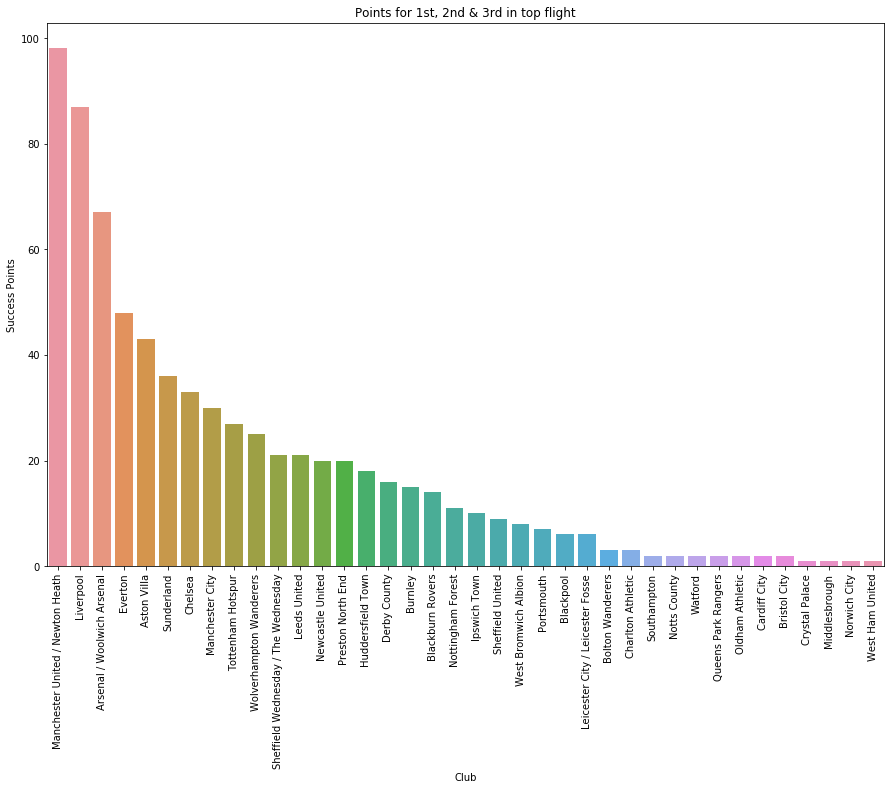

In [17]:
plt.figure(figsize = (15,10))
sns.barplot(data = top3, x = 'Club', y = 'Success Points')
plt.xticks(rotation = 90)
plt.title('Points for 1st, 2nd & 3rd in top flight')
plt.show()

That's all very well, Sam, and it does show Man Utd better. But NCFC are bottom. Below Ipswich. Is it at all possible that if all positions were taken into account, City might be higher?
This means giving points for every position. That means giving fewer points for when teams won a smaller league, which I think is probably fine. It's also a massive data headache. It's much easier to give 24 points for every first etc. Zeroes will get no points, so that's fine. But winning a small league gets the same points as winning a big league. Yes, I hear you Scotland.

**Which teams are most successful if all league finishing positions are taken into account?**

In [18]:
df_leagueplace.replace(np.nan, 0, inplace = True)
#column headings
place_list = list (df_leagueplace.columns[1:])

df_leagueplace.head(5)
y = 0
df2 = pd.DataFrame()
df2.insert(0, 'Club', df_leagueplace.Club)

for x in place_list:
    y += 1
    df2 [str(x) + 'pts'] = df_leagueplace[x] * (23 - y)
df2.insert(loc = 1, column = 'Success Points', value = df2.sum(axis = 1))
df2.sort_values(by = ['Success Points'], ascending = False, inplace = True)

df2

,Club,Success Points,1stpts,2ndpts,3rdpts,4thpts,5thpts,6thpts,7thpts,8thpts,...,13thpts,14thpts,15thpts,16thpts,17thpts,18thpts,19thpts,20thpts,21stpts,22ndpts
1,Liverpool,1718.0,396.0,273.0,140.0,209.0,162.0,68.0,96.0,90.0,...,20.0,9.0,8.0,28.0,18.0,10.0,4.0,0.0,0.0,1.0
2,Arsenal / Woolwich Arsenal,1666.0,286.0,189.0,200.0,228.0,180.0,102.0,96.0,30.0,...,30.0,27.0,0.0,7.0,12.0,5.0,4.0,6.0,0.0,0.0
3,Everton,1623.0,198.0,147.0,140.0,171.0,144.0,102.0,176.0,90.0,...,20.0,45.0,72.0,35.0,36.0,15.0,4.0,6.0,0.0,2.0
0,Manchester United / Newton Heath,1536.0,440.0,336.0,120.0,152.0,54.0,51.0,48.0,90.0,...,40.0,18.0,16.0,14.0,6.0,15.0,4.0,0.0,4.0,2.0
4,Aston Villa,1493.0,154.0,210.0,40.0,114.0,90.0,255.0,80.0,135.0,...,30.0,18.0,48.0,49.0,18.0,5.0,4.0,6.0,6.0,1.0
14,Tottenham Hotspur,1157.0,44.0,105.0,220.0,95.0,90.0,102.0,32.0,90.0,...,20.0,27.0,48.0,14.0,12.0,10.0,4.0,3.0,2.0,2.0
7,Manchester City,1126.0,110.0,105.0,100.0,95.0,126.0,17.0,64.0,90.0,...,30.0,36.0,48.0,28.0,30.0,20.0,4.0,9.0,10.0,0.0
9,Newcastle United,1121.0,88.0,42.0,80.0,152.0,126.0,51.0,48.0,90.0,...,40.0,36.0,56.0,14.0,18.0,10.0,8.0,6.0,6.0,0.0
5,Sunderland,1080.0,132.0,105.0,160.0,38.0,54.0,34.0,96.0,90.0,...,40.0,18.0,40.0,42.0,36.0,10.0,12.0,18.0,6.0,0.0
6,Chelsea,1070.0,132.0,84.0,140.0,38.0,108.0,136.0,16.0,45.0,...,60.0,36.0,8.0,14.0,6.0,30.0,24.0,6.0,4.0,2.0


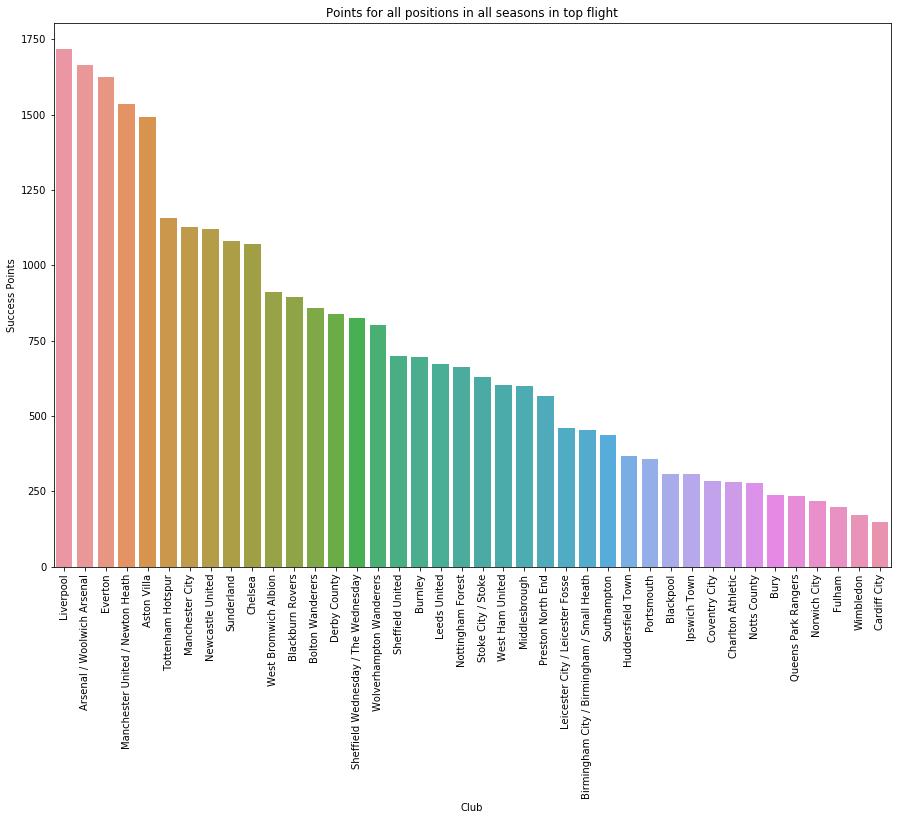

In [19]:
plt.figure(figsize = (15,10))
sns.barplot(data = df2[:40], x = 'Club', y = 'Success Points')
plt.xticks(rotation = 90)
plt.title('Points for all positions in all seasons in top flight')
plt.show()

So depending on the measure, the most successful team could be Liverpool, or Man Utd, or Arsenal. I can't remember ever seeing Everton win anything at all, or even place highly, but there they are, constantly hanging around in the top 5. To be fair they are in the top 4 title winners.

Way back above, I wondered **what correlation is there between stadium capacity and levels of success?** I am wondering about seasons in the top flight, consecutive seasons, and finishing places.

In [26]:
#I'll need the stadium data
stadia = pd.read_csv('Eng stadia utf2.csv')
stadia = stadia[['Club', 'Stadium', 'Capacity']]
#I need to clean it up - removed leading spaces using Excel - swap names to match success data
swaps = {'Manchester United':  'Manchester United / Newton Heath', 
         'Arsenal' : 'Arsenal / Woolwich Arsenal', 
         'Birmingham City' : 'Birmingham City / Birmingham / Small Heath',
         'Leicester City' : 'Leicester City / Leicester Fosse' ,
         'Sheffield Wednesday': 'Sheffield Wednesday / The Wednesday',
        'Stoke City': 'Stoke City / Stoke',
        'Accrington Stanley':'Accrington'}
stadia.replace(swaps, inplace=True)

#and I'll need the success data: starting with df2 - the points for all finishes
finish = df2[['Club','Success Points']]

#and then carry out a left merge, on Club in both
stadia_finish = pd.merge(finish, stadia, left_on = 'Club', right_on = 'Club', how = 'left').reset_index()
stadia_finish


,index,Club,Success Points,Stadium,Capacity
0,0,Liverpool,1718.0,Anfield,54074.0
1,1,Arsenal / Woolwich Arsenal,1666.0,Emirates Stadium,60260.0
2,2,Everton,1623.0,Goodison Park,39571.0
3,3,Manchester United / Newton Heath,1536.0,Old Trafford,74994.0
4,4,Aston Villa,1493.0,Villa Park,42660.0
5,5,Tottenham Hotspur,1157.0,White Hart Lane,36284.0
6,6,Manchester City,1126.0,City of Manchester Stadium,55097.0
7,7,Newcastle United,1121.0,St James Park,52338.0
8,8,Sunderland,1080.0,Stadium of Light,48707.0
9,9,Chelsea,1070.0,Stamford Bridge,41798.0


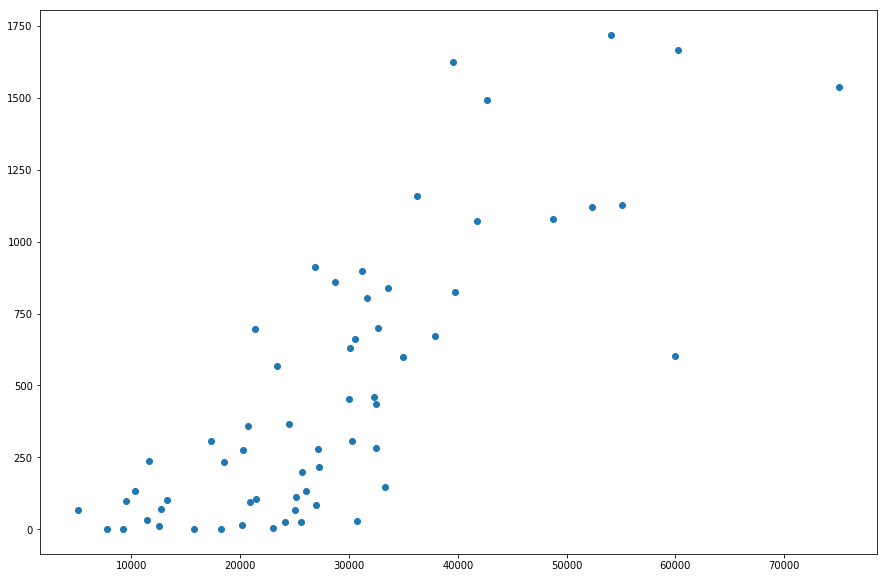

In [34]:
#I suppose a scatter plot should be used to find correlation
plt.figure(figsize = (15, 10))
ax = plt.subplot()
x = stadia_finish.Capacity
y = stadia_finish['Success Points']
ax.scatter(x, y)
plt.show()

Yup. Pretty much the case that the bigger the ground the more successful the club. I can't work out how to put a line of best fit on here though.